In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
%matplotlib inline

In [136]:
Excel = pd.ExcelFile('TakenMind.xlsx')
df_EEMP = Excel.parse('EEMP')
df_EMPWL = Excel.parse('EMPWL')

In [105]:
df_EEMP.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,2001,0.58,0.74,4,215,3,0,0,sales,low
1,2002,0.82,0.67,2,202,3,0,0,sales,low
2,2003,0.45,0.69,5,193,3,0,0,sales,low
3,2004,0.78,0.82,5,247,3,0,0,sales,low
4,2005,0.49,0.60,3,214,2,0,0,sales,low


In [106]:
df_EMPWL.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,2,0.80,0.86,5,262,6,0,0,sales,medium
2,3,0.11,0.88,7,272,4,0,0,sales,medium
3,4,0.72,0.87,5,223,5,0,0,sales,low
4,5,0.37,0.52,2,159,3,0,0,sales,low


In [5]:
df_EEMP.describe()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
count,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000
mean,7812.340742,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
std,3453.947461,0.217104,0.162005,0.979884,45.682731,1.562348,0.379991,0.159889
min,2001.000000,0.120000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,4857.750000,0.540000,0.580000,3.000000,162.000000,2.000000,0.000000,0.000000
50%,7714.500000,0.690000,0.710000,4.000000,198.000000,3.000000,0.000000,0.000000
75%,10571.250000,0.840000,0.850000,4.000000,238.000000,4.000000,0.000000,0.000000
max,14211.000000,1.000000,1.000000,6.000000,287.000000,10.000000,1.000000,1.000000


In [6]:
df_EMPWL.describe()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
count,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000
mean,6500.439653,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321
std,6266.484705,0.263933,0.197673,1.818165,61.202825,0.977698,0.212364,0.072759
min,1.000000,0.090000,0.450000,2.000000,126.000000,2.000000,0.000000,0.000000
25%,893.500000,0.130000,0.520000,2.000000,146.000000,3.000000,0.000000,0.000000
50%,1786.000000,0.410000,0.790000,4.000000,224.000000,4.000000,0.000000,0.000000
75%,12678.500000,0.730000,0.900000,6.000000,262.000000,5.000000,0.000000,0.000000
max,14999.000000,0.920000,1.000000,7.000000,310.000000,6.000000,1.000000,1.000000


In [137]:
df_EEMP['daily_hours'] = df_EEMP['average_montly_hours']/26.0
df_EMPWL['daily_hours'] = df_EMPWL['average_montly_hours']/26.0
df_EMPWL['daily_hours'] = df_EMPWL['daily_hours'].astype(int)
df_EEMP['daily_hours'] = df_EEMP['daily_hours'].astype(int)
df_EEMP.drop(['average_montly_hours', 'Emp ID'], axis=1, inplace=True)
df_EMPWL.drop(['average_montly_hours', 'Emp ID'], axis=1, inplace=True)

In [138]:
df_EEMP.head()

,satisfaction_level,last_evaluation,number_project,time_spend_company,Work_accident,promotion_last_5years,dept,salary,daily_hours
0,0.58,0.74,4,3,0,0,sales,low,8
1,0.82,0.67,2,3,0,0,sales,low,7
2,0.45,0.69,5,3,0,0,sales,low,7
3,0.78,0.82,5,3,0,0,sales,low,9
4,0.49,0.60,3,2,0,0,sales,low,8


In [113]:
df_EMPWL.head()

,satisfaction_level,last_evaluation,number_project,time_spend_company,Work_accident,promotion_last_5years,dept,salary,daily_hours
0,0.38,0.53,2,3,0,0,sales,low,6.038462
1,0.80,0.86,5,6,0,0,sales,medium,10.076923
2,0.11,0.88,7,4,0,0,sales,medium,10.461538
3,0.72,0.87,5,5,0,0,sales,low,8.576923
4,0.37,0.52,2,3,0,0,sales,low,6.115385


In [114]:
print(df_EEMP.shape)
print(df_EMPWL.shape)

(11428, 9)
(3571, 9)


In [8]:
#total percentage of people that have left their jobs at our firm X
percent_left = ceil((len(df_EMPWL)/(len(df_EMPWL)+len(df_EEMP)))*100)
print("As we can see approximately {}% people have left their jobs from a total of {} people.".format(percent_left, len(df_EMPWL)+len(df_EEMP)))

As we can see approximately 24% people have left their jobs from a total of 14999 people.


In [139]:
#people that left because of salary issues
df_count = df_EMPWL['salary'].value_counts()
total = df_EMPWL['salary'].value_counts().sum()
percent_left = (df_count/total)*100
print(percent_left)

low       60.823299
medium    36.880426
high       2.296276
Name: salary, dtype: float64


We can clearly see here that the employees with low salary are more prone to leaving their jobs

In [140]:
df_count = df_EEMP['salary'].value_counts()
total = df_EEMP['salary'].value_counts().sum()
percent_left = (df_count/total)*100
print(percent_left)

low       45.012251
medium    44.880994
high      10.106755
Name: salary, dtype: float64


We can expect 45% of our current employees to leave their jobs.

In [141]:
#people that left based on promotion in the last five years
df_count = df_EMPWL['promotion_last_5years'].value_counts()
percent_left = df_count/df_count.sum()
print(percent_left)

0    0.994679
1    0.005321
Name: promotion_last_5years, dtype: float64


We can clearly see that the employees that did not recieve a promotion in last 5 yrs were more likely to leave the firm.

In [142]:
df_count = df_EEMP['promotion_last_5years'].value_counts()
percent_left = df_count/df_count.sum()
print(percent_left)

0    0.973749
1    0.026251
Name: promotion_last_5years, dtype: float64


We can expect 97% of our current employees to resign from their jobs based on the given data.

In [16]:
df_count = df_EMPWL['Work_accident'].value_counts()
#print(df_count)
percent_left = df_count/df_count.sum()
print(percent_left)

0    0.952674
1    0.047326
Name: Work_accident, dtype: float64


As we can see that around 95% of employees left even without a work accident scenario this information is not very useful for us.

In [143]:
#people that left on account of their satisfaction level
filter = df_EMPWL['satisfaction_level']<0.40
df_count = ceil((len(df_EMPWL[filter])/3571)*100)
print('We can see that {}% people left when their satisfaction level was less than 50%.'.format(df_count))

We can see that 44% people left when their satisfaction level was less than 50%.


In [144]:
filter = df_EEMP['satisfaction_level']<0.40
df_count = ceil((len(df_EEMP[filter])/11428)*100)
print('We can expect {}% of our current employees to resign as the satisfaction level for them is below 50%.'.format(df_count))

We can expect 12% of our current employees to resign as the satisfaction level for them is below 50%.


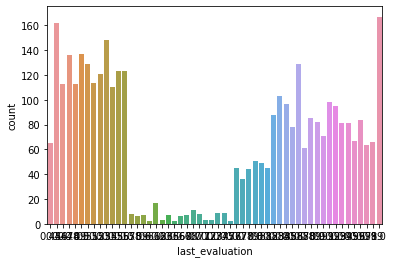

In [116]:
plt.plot(figsize = (10,10))
sns.countplot(df_EMPWL['last_evaluation'])

People with either very low or very high last evaluation were the ones that resigned from their jobs the most.

In [145]:
#people that left on the basis of last evaluation
filter = df_EMPWL['last_evaluation']>0.5
df_count = df_EMPWL[filter]
len_df = len(df_count)
len_adf = len(df_EMPWL)
print('Number of people that did good on evaluation but left ',len_df)
print('Actual number of people that took the evaluation and left ', len_adf)
percent = ceil((len_df/len_adf)*100)
print('Approximately {}% people left even after scoring more than 50% on evaluation.'.format(percent))

Number of people that did good on evaluation but left  2845
Actual number of people that took the evaluation and left  3571
Approximately 80% people left even after scoring more than 50% on evaluation.


In [146]:
filter = df_EEMP['last_evaluation']>0.5
df_count = df_EEMP[filter]
len_df = len(df_count)
len_adf = len(df_EEMP)
percent = ceil((len_df/len_adf)*100)
print('Approximately {}% people can quit their jobs even after scoring more than 50% on evaluation.'.format(percent))

Approximately 90% people can quit their jobs even after scoring more than 50% on evaluation.


In [147]:
median_value = df_EMPWL['time_spend_company'].median()
print(median_value)

4.0


In [150]:
#people that left the company based on the number of years of employment within the firm
filter = df_EMPWL['time_spend_company']<4
df_count = df_EMPWL[filter]
len_df = len(df_count)
len_adf = len(df_EMPWL)
percent = ceil((len_df/len_adf)*100)
print('Around {}% people left their jobs when they were under {} years of employment within the firm.'.format(percent, median_value.astype(int)))

Around 46% people left their jobs when they were under 4 years of employment within the firm.


In [149]:
filter = df_EEMP['time_spend_company']<4
df_count = df_EEMP[filter]
len_df = len(df_count)
len_adf = len(df_EEMP)
percent = ceil((len_df/len_adf)*100)
print('Around {}% people are expected to vacate their jobs when they are under 4 years of employment within the firm.'.format(percent))

Around 71% people are expected to vacate their jobs when they are under 4 years of employment within the firm.


In [151]:
#people that left the firm based on their number of projects
df_count = df_EMPWL['number_project'].value_counts()
percent = df_count/df_count.sum()
print(percent)

2    0.438813
6    0.183422
5    0.171381
4    0.114534
7    0.071689
3    0.020162
Name: number_project, dtype: float64


43% people left their jobs when they had 2 projects.

In [152]:
df_count = df_EEMP['number_project'].value_counts()
percent = df_count/df_count.sum()
print(percent)

3    0.348530
4    0.346167
5    0.188047
2    0.071841
6    0.045415
Name: number_project, dtype: float64


Around 7% people can be seen vacating their jobs based on previous employees data.

In [153]:
df_count = df_EMPWL[df_EMPWL['number_project']<4.1]
len_df = len(df_count)
percent = ceil((len_df/len(df_EMPWL))*100)
print(percent)

58


In [154]:
df_count = df_EEMP[df_EEMP['number_project']<4.1]
len_df = len(df_count)
percent = ceil((len_df/len(df_EEMP))*100)
print('Approximatley {}% people can be expected to leave their jobs as they have less than the median number of projects.'.format(percent))

Approximatley 77% people can be expected to leave their jobs as they have less than the median number of projects.


In [155]:
#people that left their jobs because of their job deparments
df_EMPWL['dept'].value_counts()

sales          1014
technical       697
support         555
IT              273
hr              215
accounting      204
marketing       203
product_mng     198
RandD           121
management       91
Name: dept, dtype: int64

In [156]:
#people that left their jobs because of daily working hours
df_EMPWL['daily_hours'].median()
filter = df_EMPWL['daily_hours']>7
df_count = df_EMPWL[filter]
len_df = len(df_count)
len_adf = len(df_EMPWL)
percent = ceil((len_df/len_adf)*100)
print('Approximately {}% people left when the daily average working hours exceeded 7.'.format(percent))

Approximately 54% people left when the daily average working hours exceeded 7.


In [157]:
filter = df_EEMP['daily_hours']>7
df_count = df_EEMP[filter]
len_df = len(df_count)
len_adf = len(df_EEMP)
percent = ceil((len_df/len_adf)*100)
print('We can expect {}% people to leave when the daily average working hours exceed 7.'.format(percent))

We can expect 45% people to leave when the daily average working hours exceed 7.


We will not be considering the department field for evaluating our candidates as it provides no significant insights whatsoever.